#    PROJECT 1: EXPLORE WEATHER TRENDS

In this project, I used SQL to extract data from the Udacity's server and export to CSV files. Then I used Python – Jupyter Notebook to conduct data wrangling, data analysis, and visualization.
I calculated the moving averages by taking the averages of 5, 10, and 20 consecutive years with the rolling.mean() method in Python, which will be demonstrated later on in this paper.
Step 1: Extract the data
- I needed to find the city in the city_list database that is closest to where I live. Since I live in the US, it would make more sense to narrow the list by country.
SELECT * FROM city_list WHERE country IN ('United States', 'USA', 'America')
This gives me a table of 52 results, which I can easily locate Boston as the city where I live.
- I use the following query to filter data of Boston from the city_data SELECT * FROM city_data WHERE city = 'Boston'
I saved the data in a file named Weatherdata_citylvl.csv
- I use the following query to display all columns of the global_data SELECT * FROM global_data
I saved the data in a file named Weatherdata_global.csv

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling for the Boston data set

In [3]:
#load the city_data file
city_data = pd.read_csv('Weatherdata_citylvl.csv')
print(city_data)

     year    city        country  avg_temp
0    1743  Boston  United States      1.19
1    1744  Boston  United States      9.63
2    1745  Boston  United States     -1.37
3    1746  Boston  United States       NaN
4    1747  Boston  United States       NaN
..    ...     ...            ...       ...
266  2009  Boston  United States      8.07
267  2010  Boston  United States      9.58
268  2011  Boston  United States      9.12
269  2012  Boston  United States     10.06
270  2013  Boston  United States     10.38

[271 rows x 4 columns]


The global_data set only had temperatures from 1750 to 2015 while the city_data set only has values for the 1743-2013 period. Therefore, I would drop some years’ data in each data set to bring them all to only one reference period, i.e 1750 to 2013.

In [4]:
#drop years earlier than 1750 to make this data set in the same time period with the global data set
city_data = city_data[city_data['year'] >= 1750]

Investigating if there are any missing values

In [5]:
#basic investigation of the city data file
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 7 to 270
Data columns (total 4 columns):
year        264 non-null int64
city        264 non-null object
country     264 non-null object
avg_temp    263 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.3+ KB


From the above, there is only one missing value left to be treated. I investigated the series to determine the best treatment for the missing value in the city_data set

In [6]:
#describe the data
city_data['avg_temp'].describe()

count    263.000000
mean       7.303764
std        1.156479
min       -2.310000
25%        6.805000
50%        7.360000
75%        7.910000
max       10.380000
Name: avg_temp, dtype: float64

Since the data is mostly normally distributed with its mean almost equaling its median and there is only one missing value, imputation by either the mean value or the median value would work. I imputed the missing values in the city_data set by the following code:

In [7]:
#impute missing values with the data set's mean

city_data.fillna(city_data['avg_temp'].mean(), inplace=True)
print(city_data)

     year    city        country  avg_temp
7    1750  Boston  United States      7.88
8    1751  Boston  United States      8.60
9    1752  Boston  United States      0.36
10   1753  Boston  United States      7.35
11   1754  Boston  United States      7.75
..    ...     ...            ...       ...
266  2009  Boston  United States      8.07
267  2010  Boston  United States      9.58
268  2011  Boston  United States      9.12
269  2012  Boston  United States     10.06
270  2013  Boston  United States     10.38

[264 rows x 4 columns]


## Calulating moving averages for Boston temperatures

In [11]:
# add the simple moving average over a period of 5 years into the original data
city_data['SMA_5'] = city_data.avg_temp.rolling(5).mean()
# add the simple moving average over a period of 10 years into the original data
city_data['SMA_10'] = city_data.avg_temp.rolling(10).mean()
# add the simple moving average over a period of 20 years into the original data
city_data['SMA_20'] = city_data.avg_temp.rolling(20).mean()
print(city_data)

     year    city        country  avg_temp  SMA_5  SMA_10  SMA_20
7    1750  Boston  United States      7.88    NaN     NaN     NaN
8    1751  Boston  United States      8.60    NaN     NaN     NaN
9    1752  Boston  United States      0.36    NaN     NaN     NaN
10   1753  Boston  United States      7.35    NaN     NaN     NaN
11   1754  Boston  United States      7.75  6.388     NaN     NaN
..    ...     ...            ...       ...    ...     ...     ...
266  2009  Boston  United States      8.07  8.600   8.480   8.457
267  2010  Boston  United States      9.58  8.804   8.638   8.476
268  2011  Boston  United States      9.12  8.732   8.659   8.478
269  2012  Boston  United States     10.06  9.072   8.763   8.611
270  2013  Boston  United States     10.38  9.442   9.023   8.738

[264 rows x 7 columns]


## Visualizing Boston's moving averages

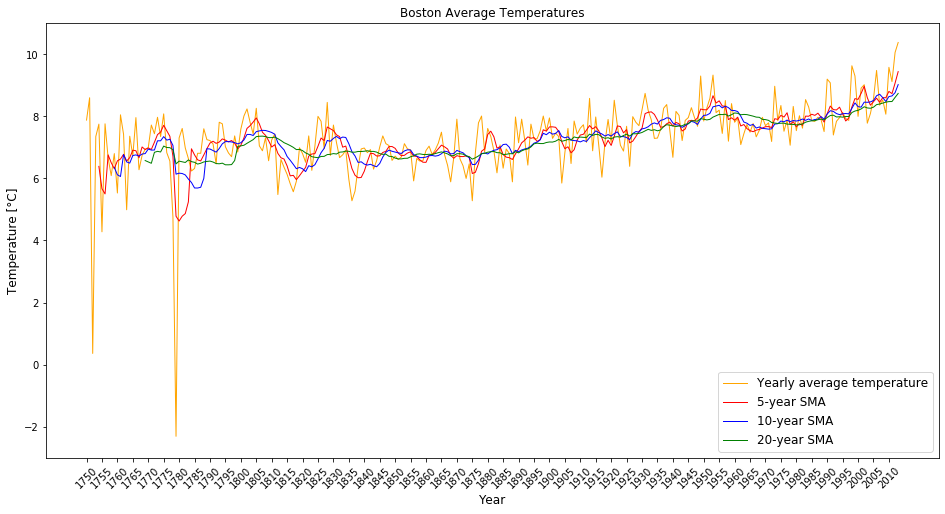

In [13]:

#plot all of the new moving averages into the city_data plot
plt.plot(city_data['year'], city_data['avg_temp'], color='orange', linewidth=1)
plt.plot(city_data['year'], city_data['SMA_5'], color='red', linewidth=1)
plt.plot(city_data['year'], city_data['SMA_10'], color='blue', linewidth=1)
plt.plot(city_data['year'], city_data['SMA_20'], color='green', linewidth=1)


# modify legend
plt.legend(labels =['Yearly average temperature', '5-year SMA', '10-year SMA', '20-year SMA'], fontsize=12)

# title and labels
plt.title('Boston Average Temperatures', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)
plt.xticks(np.arange(1750, 2013, step=5), rotation=45)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.ylim(-3)
plt.savefig('figure1.png')
plt.show()

The 20-year moving average seems to smooth out the best, making it clear to see long-term trend. Therefore, I would use the 20-year moving average for further analysis.

## Data Wrangling for the global temperatures data set

In [8]:
#load the global_data file
global_data = pd.read_csv('weatherdata_global.csv')
print(global_data)

     year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83

[266 rows x 2 columns]


I investigated the data set with the following code. Fortunately, there is no missing value, hence no treatment needed.

In [9]:
#basic investigation of the city data file 
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


As discussed above, the global data spans from 1750 to 2015, so I would drop the last two years to bring the data to the same reference period with the Boston data.

In [17]:
#drop years later than 2013 to bring this data set to the same time period with the city
global_data = global_data[global_data['year'] <= 2013]
print(global_data)

     year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
259  2009      9.51
260  2010      9.70
261  2011      9.52
262  2012      9.51
263  2013      9.61

[264 rows x 2 columns]


## Calculate Global moving averages

In [18]:
# add the simple moving average over a period of 5 years into the original data
global_data['SMA_5'] = global_data.avg_temp.rolling(5).mean()
# add the simple moving average over a period of 10 years into the original data
global_data['SMA_10'] = global_data.avg_temp.rolling(10).mean()
# add the simple moving average over a period of 20 years into the original data
global_data['SMA_20'] = global_data.avg_temp.rolling(20).mean()
print(global_data)

     year  avg_temp  SMA_5  SMA_10  SMA_20
0    1750      8.72    NaN     NaN     NaN
1    1751      7.98    NaN     NaN     NaN
2    1752      5.78    NaN     NaN     NaN
3    1753      8.39    NaN     NaN     NaN
4    1754      8.47  7.868     NaN     NaN
..    ...       ...    ...     ...     ...
259  2009      9.51  9.580   9.493  9.3245
260  2010      9.70  9.580   9.543  9.3480
261  2011      9.52  9.578   9.554  9.3650
262  2012      9.51  9.534   9.548  9.3985
263  2013      9.61  9.570   9.556  9.4355

[264 rows x 5 columns]


## Visualize Global Moving Averages

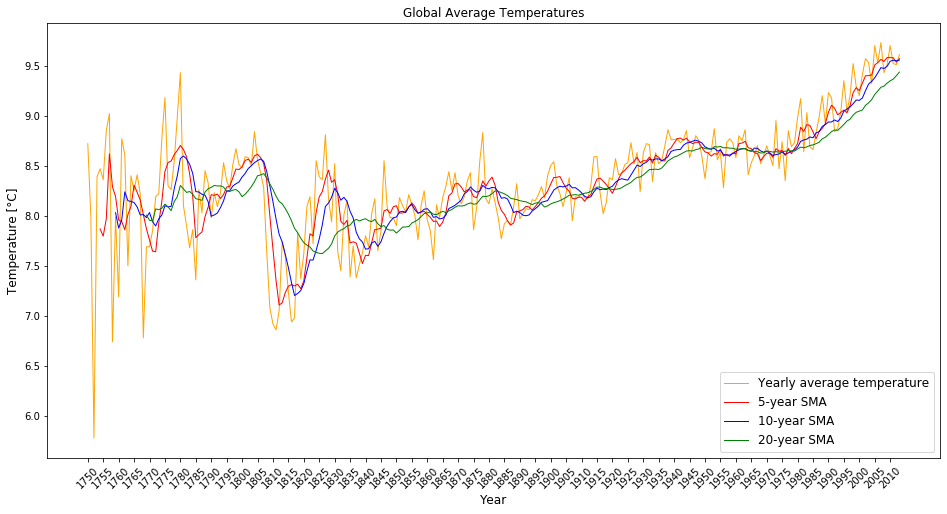

In [19]:

#plot all of the new moving averages into the city_data plot
plt.plot(global_data['year'], global_data['avg_temp'], color='orange', linewidth=1)
plt.plot(global_data['year'], global_data['SMA_5'], color='red', linewidth=1)
plt.plot(global_data['year'], global_data['SMA_10'], color='blue', linewidth=1)
plt.plot(global_data['year'], global_data['SMA_20'], color='green', linewidth=1)


# modify legend
plt.legend(labels =['Yearly average temperature', '5-year SMA', '10-year SMA', '20-year SMA'], fontsize=12)

# title and labels
plt.title('Global Average Temperatures', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)
plt.xticks(np.arange(1750, 2013, step=5), rotation=45)
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.savefig('figure2.png')
plt.show()

The 20-year moving average seems to smooth out the best, making it clear to see long-term trend. Therefore, I would use the 20-year moving average for further analysis.

## Visualizing and Comparing Boston and Global's 20-year moving averages

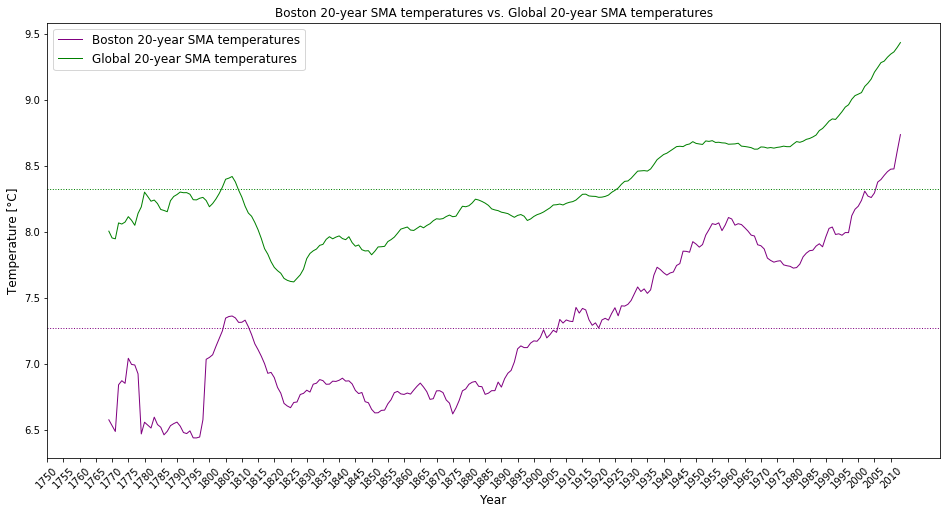

In [25]:
#plot 20-year SMA of both Boston and global

#specify lines
plt.plot(city_data['year'], city_data['SMA_20'], color= 'purple', linewidth=1)
plt.plot(global_data['year'], global_data['SMA_20'], color='green', linewidth=1)

#specify legends
plt.legend(labels = ['Boston 20-year SMA temperatures', 'Global 20-year SMA temperatures'], fontsize = 12)

#chart title
plt.title('Boston 20-year SMA temperatures vs. Global 20-year SMA temperatures', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature [°C]', fontsize = 12)
plt.xticks(np.arange(1750, 2013, step=5), rotation=45)
plt.axhline(city_data['SMA_20'].mean(), color = 'purple', linestyle = 'dotted', linewidth = 1, label = 'Boston 20-year SMA mean line')
plt.axhline(global_data['SMA_20'].mean(), color = 'green', linestyle = 'dotted', linewidth = 1, label = 'Global 20-year SMA mean line')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.savefig('figure3.png')
plt.show()

## Observations

- Boston was always cooler compared to the world, although the difference is not consistent overtime. Boston temps, on average was 1 degree Celsius cooler than the world. However, during the 1775-1800 period, the difference between Boston’s 20-year moving average and that of the world peaked, at approximately 1.8 Degree Celsius. In contrast, the difference was narrower for the 1980-2013 period, at lower than 1 Degree Celsius.

- Except for the period before 1805, Boston’s 20-year moving averages seemed to follow the similar upward with that of the Global data, Boston temperatures increased at a faster rate. Before 1805, Boston and the world did not follow the same pattern. While the World temperature gradually increased to a high of just under 8.5 Degree Celsius in 1805, Boston’s temperature experienced more wild changes, quickly from a surge, a plummet, plateau, to a high of roughly 7.25 Degree Celsius in 1805. After 1805, they followed similar pattern of increase, except for two periods of decline: (1805-1925) and (1960-1980).

- Except for a few periods of decline for both Boston and the world discussed above, over the last few hundred years, the world and Boston were getting hotter, with an increase by 1.5 Degree Celsius for the world and over 2 Degree Celsius for Boston. Boston’s temperatures increased at a faster pace, narrowing the lead that the world took.